In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Charger le jeu de données
df_path = 'dataset_test2.csv'
df = pd.read_csv(df_path, low_memory=False)

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist()
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_split=2, min_samples_leaf=1))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Entraîner le modèle randomforest
rf_pipeline.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

(accuracy, report)


(0.8766555144941798,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.45      0.60     27821\n           1       0.88      0.98      0.93    109372\n\n    accuracy                           0.88    137193\n   macro avg       0.88      0.72      0.76    137193\nweighted avg       0.88      0.88      0.86    137193\n')

In [4]:
df = pd.read_csv('dataset_test2.csv')
df

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,1,0,N,N,P I F,287000.0,215250.0
3,CT,6062,DE,332721,120,19,1.0,1,0,N,N,P I F,517000.0,387750.0
4,FL,34491,AL,811118,84,1,2.0,1,0,N,Y,P I F,45000.0,36000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685957,MD,21224,MD,332431,60,20,1.0,1,0,NaN,N,P I F,50000.0,25000.0
685958,CA,92020,CA,314912,36,40,1.0,1,0,N,N,P I F,200000.0,150000.0
685959,OH,43221,IL,451120,60,6,1.0,1,0,NaN,N,P I F,70000.0,56000.0
685960,OH,43221,IL,451130,60,6,1.0,1,0,Y,N,P I F,85000.0,42500.0


In [5]:
import pandas as pd
df = pd.read_csv('dataset_test3.csv')
df

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status
0,IN,47711,OH,451120,84,4,2.0,1,0,N,Y,P I F
1,IN,46526,IN,722410,60,2,2.0,1,0,N,Y,P I F
2,IN,47401,IN,621210,180,7,1.0,1,0,N,N,P I F
3,CT,6062,DE,332721,120,19,1.0,1,0,N,N,P I F
4,FL,34491,AL,811118,84,1,2.0,1,0,N,Y,P I F
...,...,...,...,...,...,...,...,...,...,...,...,...
685957,MD,21224,MD,332431,60,20,1.0,1,0,NaN,N,P I F
685958,CA,92020,CA,314912,36,40,1.0,1,0,N,N,P I F
685959,OH,43221,IL,451120,60,6,1.0,1,0,NaN,N,P I F
685960,OH,43221,IL,451130,60,6,1.0,1,0,Y,N,P I F


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Charger le jeu de données

df = pd.read_csv('dataset_test3.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist()
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


rf_pipeline.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

(accuracy, report)


(0.8725518065790528,
 '              precision    recall  f1-score   support\n\n           0       0.85      0.45      0.59     27821\n           1       0.88      0.98      0.92    109372\n\n    accuracy                           0.87    137193\n   macro avg       0.86      0.72      0.76    137193\nweighted avg       0.87      0.87      0.86    137193\n')

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Charger le jeu de données

df = pd.read_csv('dataset_test3.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist()
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_split=2, min_samples_leaf=1))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


rf_pipeline.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

(accuracy, report)


(0.8680472035745264,
 '              precision    recall  f1-score   support\n\n      CHGOFF       0.88      0.40      0.55     27821\n       P I F       0.87      0.99      0.92    109372\n\n    accuracy                           0.87    137193\n   macro avg       0.87      0.69      0.74    137193\nweighted avg       0.87      0.87      0.85    137193\n')

Matrice de confusion pour le modèle Random Forest


,Predicted no,Predicted yes
Actual no,44697,66586
Actual yes,5663,431823


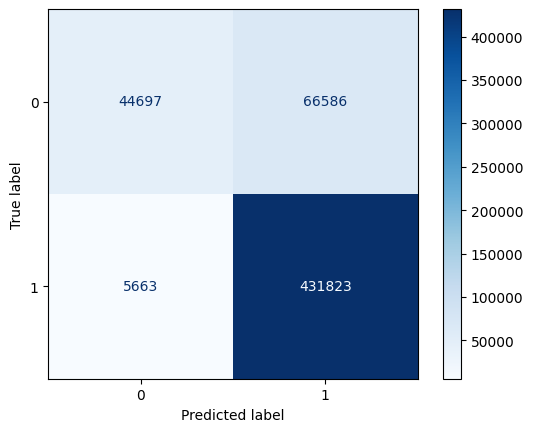

In [5]:
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

y_train_pred_rf = cross_val_predict(rf_pipeline, X_train, y_train)
cm_tr = confusion_matrix(y_train, y_train_pred_rf)
conf_matrix_tr = pd.DataFrame(cm_tr, index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
print("Matrice de confusion pour le modèle Random Forest")
display(conf_matrix_tr)

graph_cm_tr = ConfusionMatrixDisplay(cm_tr, display_labels=rf_pipeline.classes_)
graph_cm_tr.plot(cmap="Blues")

In [5]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_co

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Charger le jeu de données

df = pd.read_csv('dataset_test3.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist()
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_split=2, min_samples_leaf=1))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


rf_pipeline.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

(accuracy, report)


ModuleNotFoundError: No module named 'xgboost'